In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
genpath = "/home/jorgebdelafuente/Doctorado/Quantics/PH2p_1TApp/"
expfile = genpath+"ph2p_bckup/ph2p_v11/expect.pl"
expfile = genpath+"ph2p/expect.pl"

flxdat = np.loadtxt(expfile, skiprows=7, usecols=(0,1), unpack=True)

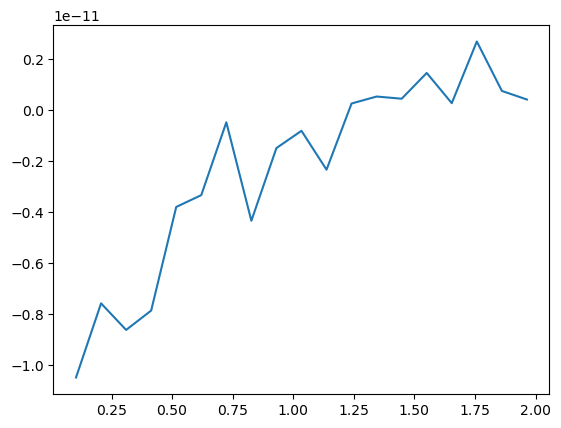

In [12]:
t_s = flxdat[0]*1e-15
dt = t_s[1]-t_s[0]
N = len(t_s)

fft = np.fft.fft(flxdat[1])
freq = np.fft.fftfreq(N,d=dt)
fft = np.fft.fftshift(fft)
freq = np.fft.fftshift(freq)

h = 6.62607015e-34
e = 1.602176634e-19
E_eV = h * freq / e

pos = E_eV>0

fig,ax = plt.subplots()
ax.plot(E_eV[pos],(fft[pos])**2)

1e-15


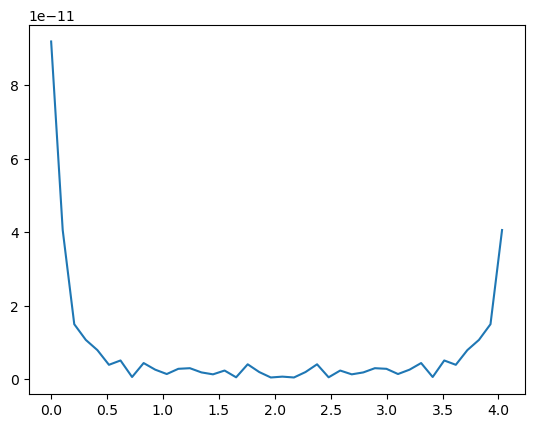

In [ ]:
hbar = 6.582119569e-16
fs_to_s = 1e-15

def dft(f_t): 

    N = len(f_t)
    F_k = []
    for k in range(N):
        sum_k = 0
        for n in range(N):
            angle = -2*np.pi*k*n/N
            sum_k += f_t[n]*np.exp(1j*angle)
        F_k.append(sum_k)
    return F_k

def idft(F_k):

    N = len(F_k)
    f_t = []
    for n in range(N):
        sum_n = 0
        for k in range(N):
            angle = 2*np.pi*k*n/N
            sum_n += F_k[k]*np.exp(1j*angle)
        f_t.append(sum_n)
    return f_t

def energia_dft(F_k,dt_fs):

    N = len(F_k)
    dt_s = dt_fs*fs_to_s
    energia = []
    for k in range(N):
        ek = (2*np.pi*k)
        energia.append(ek)
    E_eV = hbar*np.array(energia)/(dt_fs*N)
    return E_eV

def fft(f_t,dt_fs):

    F_k = dft(f_t)
    E_eV = energia_dft(F_k,dt_fs)
    return E_eV, F_k

# print(dt)
# dt=1e-15
E_eV, F_k = fft(flxdat[1],dt)

fig,ax = plt.subplots()
F_k = np.abs(F_k)**2
ax.plot(E_eV,F_k)



In [5]:
psifile = genpath+"ph2p/psi"

# with open(psifile, "rb") as f:
#     content = f.read(64)  # Lee los primeros 64 bytes
#     print(content)

# with open(psifile, "rb") as f:
#     chunk = f.read(2048)  # lee los primeros 2 KB
#     print(chunk)

with open(psifile, "rb") as binf:
    contenido = binf.read()
    print(contenido[:300])  # inspecciona los primeros 300 bytes


b'\x08\x00\x00\x00l\xfdnfff*@\x08\x00\x00\x00 \x00\x00\x00<start array dimensions>         \x00\x00\x00 \x00\x00\x00<maxdim>                         \x00\x00\x00\x04\x00\x00\x00\x08\x00\x00\x00\x04\x00\x00\x00 \x00\x00\x00<maxsta>                         \x00\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00 \x00\x00\x00<maxddsta>                       \x00\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00 \x00\x00\x00<maxqcsta>                       \x00\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00 \x00\x00\x00<maxgwp>                        '


In [6]:
bloque = 0

while True:
    try:
        # Intenta leer como string (etiqueta tipo "<tinit>")
        tag = f.read_record('S')[0].strip()
        print(f"Tag: {tag}")

        # Ahora decide cómo leer el siguiente bloque
        if tag in [b'<lpsiopt>', b'<ldd>', b'<lddmctdh>']:
            data = f.read_record(np.int32)  # o np.int64, según el Fortran
            print(f"  -> Int data: {data}")

        elif tag in [b'<tinit>', b'<out2>']:
            data = f.read_record(np.float64)
            print(f"  -> Float data: {data}")

        elif tag in [b'<psi>']:  # o similar, si sabes cómo se llama
            data = f.read_record(np.complex128)
            print(f"  -> Complex128: {data[:4]} ... total: {len(data)}")

        elif tag == b'<end psi info>':
            print("Fin del bloque de info")
            break

        else:
            print("Etiqueta desconocida. Intento leer como float:")
            try:
                data = f.read_record(np.float64)
                print(f"  -> Datos: {data}")
            except Exception as e:
                print("Error leyendo como float:", e)
                break

    except Exception as e:
        print("Error general:", e)
        break

Error general: name 'f' is not defined
